In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
import warnings
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta 
from uszipcode import SearchEngine

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.set_option('display.max_columns', 100)
# Hide warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./sbaNational.csv', index_col='LoanNr_ChkDgt')

In [3]:
df.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [4]:
naics = csv.DictReader(open("naics.csv"))

In [5]:
# create a dictionary mapping industry codes to industries
newdict = {}
for n in naics:
    newdict.update({n['Sector']:n['Adjusted']})

In [6]:
# split the NAICS data into sectors, which are contained in first 2 digits
df['sector'] = df.NAICS.apply(lambda x: str(x)[:2] if x!=0 else 'None')

In [7]:
# some categories have different number codes but are actually the same eg 31-33.  
df['sector'].unique()

array(['45', '72', '62', 'None', '33', '81', '23', '44', '42', '61', '53',
       '54', '31', '51', '71', '52', '21', '32', '56', '48', '11', '92',
       '22', '49', '55'], dtype=object)

In [8]:
df['sector'] = df['sector'].map(newdict)

In [9]:
df.sector.unique()

array(['44', '72', '62', nan, '31', '81', '23', '42', '61', '53', '54',
       '51', '71', '52', '21', '56', '48', '11', '92', '22', '55'],
      dtype=object)

In [10]:
df.drop('NAICS', axis=1, inplace=True)

In [11]:
# shorten index name to 'ID'
df.index.name='ID'

In [12]:
# explore dataset size
df.shape

(899164, 26)

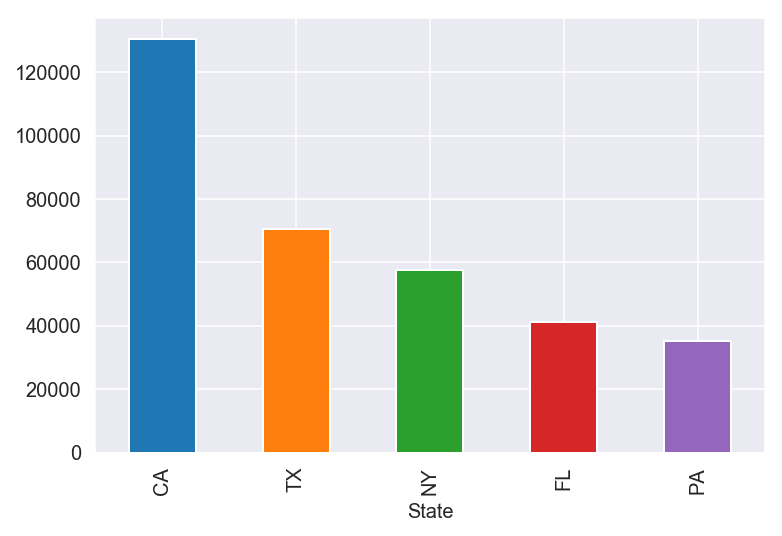

In [13]:
df.groupby('State').size().sort_values(ascending=False)[:5].plot(kind='bar')
#df.groupby('cokey').apply(pd.DataFrame.sort, 'A')

<b>the dataset in current form is far too big and attempts to run nlp and classification models
have run into chronic memory errors. let's just limit the dataset to PA state, which has under 40,000 rows.

In [14]:
df = df[df.State=='PA']

In [15]:
# remove $,. signs
def strrep(df, chars):
    str_cols = df.select_dtypes(['object']).columns
    chars = '['+chars+']'
    df[str_cols] = df[str_cols].apply(lambda x: x.str.replace(chars, ''))

In [16]:
strrep(df, '$,.')

In [17]:
# convert dates to datetime objects
df.DisbursementDate = pd.to_datetime(df.DisbursementDate, format='%d-%b-%y')
df.ChgOffDate = pd.to_datetime(df.ChgOffDate, format='%d-%b-%y')
df.ApprovalDate = pd.to_datetime(df.ApprovalDate, format='%d-%b-%y')

In [18]:
df.select_dtypes(['object'])

,Name,City,State,Bank,BankState,ApprovalFY,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector
ID,,,,,,,,,,,,,,,
1000714001,HUGH GIBBONS PLUMBING AND HEAT,SWARTHMORE,PA,TD BANK NATIONAL ASSOCIATION,PA,NaN,N,Y,1500000,000,P I F,000,1500000,1200000,44
1000824010,AADVANTAGE INSURANCE & FINANCI,FORT WASHINGTON,PA,UNITED BANK OF PHILADELPHIA,PA,NaN,N,Y,3500000,000,P I F,000,3500000,2800000,52
1000925001,Vincent Pilotta,Pittsburgh,PA,WELLS FARGO BANK NATL ASSOC,SD,NaN,0,N,2000000,000,P I F,000,2000000,1000000,42
1001725002,Faust Funeral Home Inc,Langhorne,PA,WELLS FARGO BANK NATL ASSOC,PA,NaN,0,N,5500000,000,P I F,000,5500000,2750000,NaN
1001785009,West Reading Used Furniture,West Reading,PA,WELLS FARGO BANK NATL ASSOC,PA,NaN,0,N,2000000,000,P I F,000,2000000,1000000,NaN
1001885004,REYNOLDS H20 PLUS,WEST READING,PA,WELLS FARGO BANK NATL ASSOC,PA,NaN,0,N,10000000,000,P I F,000,10000000,5000000,NaN
1001905008,REYNOLDS H20 PLUS,WEST READING,PA,WELLS FARGO BANK NATL ASSOC,PA,NaN,0,N,10000000,000,P I F,000,10000000,5000000,NaN
1001915000,REYNOLDS H20 PLUS,WEST READING,PA,WELLS FARGO BANK NATL ASSOC,PA,NaN,0,N,10000000,000,P I F,000,10000000,5000000,NaN
1001965004,DRS Formalwear Inc,Lancaster,PA,SANTANDER BANK NATL ASSOC,PA,NaN,0,N,8000000,000,P I F,000,8000000,4000000,NaN


In [19]:
floatcols = ['DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']
df[floatcols] = df[floatcols].astype(float)


In [20]:
df.MIS_Status.value_counts(dropna=False)

P I F     29712
CHGOFF     5089
NaN         369
Name: MIS_Status, dtype: int64

In [21]:
# since this is our y variable and we cannot be sure how NAs should be classified, drop those
df= df[~df.MIS_Status.isnull()]
df.shape

(34801, 26)

In [22]:
#let's create the 'default' col which will also be our 'y' variable for later.
df['default'] = df.MIS_Status.map({'P I F':0, 'CHGOFF':1})

In [23]:
df.drop('MIS_Status', axis=1, inplace=True)

In [24]:
# let's create a variable for fiscal quarters of loans approved. 
df['MoApproved'] = df.ApprovalDate.dt.month.map({6: 'Q3', 7:'Q4', 8:'Q4', 9: 'Q4', 10: 'Q1', 11:'Q1',\
                        3: 'Q2', 4:'Q3', 5: 'Q3', 12: 'Q1', 1: 'Q2', 2:'Q2'})

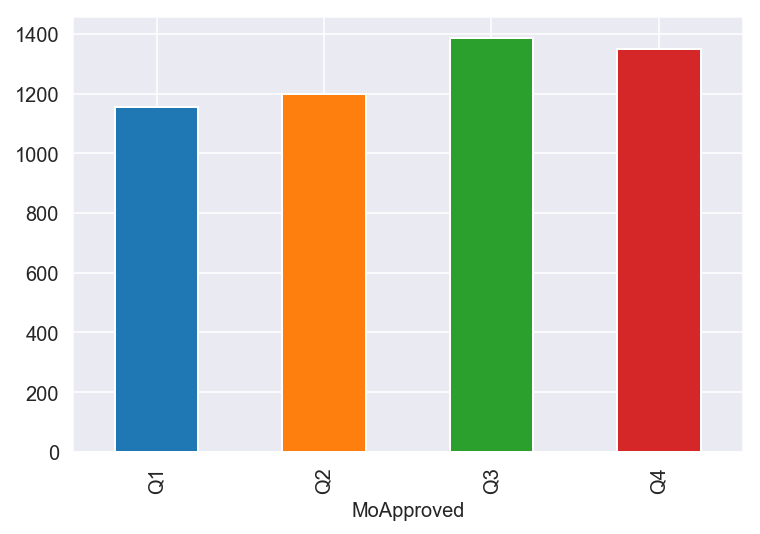

In [25]:
# plot number of defaults against fiscal quarters
df.groupby('MoApproved').default.sum().plot(kind='bar')

In [26]:
# check that chgoffdates should be null for undefaulted companies
df[(df.default==0)&(~df.ChgOffDate.isnull())]['default'].count()

174

In [27]:
# remove dates
df.ChgOffDate = np.where((df.default==0)&(~df.ChgOffDate.isnull()), pd.NaT, df.ChgOffDate) 
df.ChgOffDate = df.ChgOffDate.astype('datetime64[D]')

In [28]:
df.DisbursementDate.isnull().sum()

111

In [29]:
# average time between disbursement and approval
timebet = np.median((df[~df.DisbursementDate.isnull()].DisbursementDate- \
           df[~df.DisbursementDate.isnull()].ApprovalDate)).astype('timedelta64[D]') 
timebet

numpy.timedelta64(62,'D')

In [30]:
# let's impute this date into the missing disbursement fields
df.DisbursementDate = np.where(df.DisbursementDate.isnull(),\
                               df.ApprovalDate+ 
                               timebet, df.DisbursementDate)

{'whiskers': [<matplotlib.lines.Line2D at 0xf5b3eeb668>,
 'caps': [<matplotlib.lines.Line2D at 0xf5b3eebf28>,
 'boxes': [<matplotlib.lines.Line2D at 0xf5b3eeb0f0>],
 'medians': [<matplotlib.lines.Line2D at 0xf5b6b0c828>],
 'fliers': [<matplotlib.lines.Line2D at 0xf5b6b0cc88>],
 'means': []}

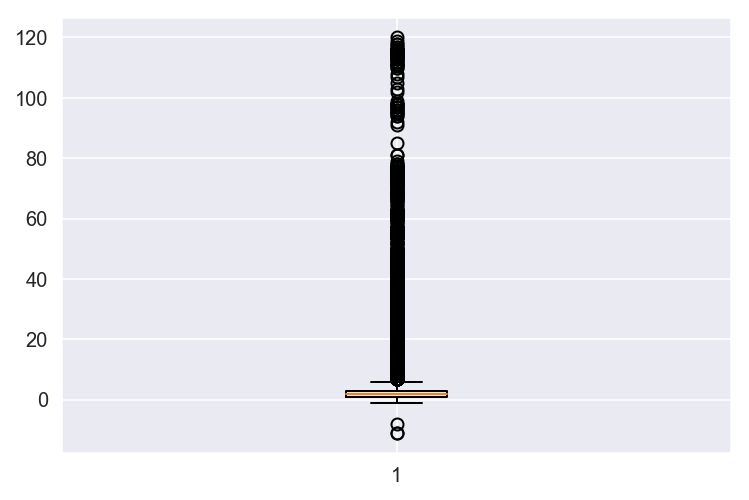

In [31]:
plt.boxplot((df.DisbursementDate - df.ApprovalDate).astype('timedelta64[M]'))

In [32]:
# let's investigate disbursement dates > approval dates by more than 1800 days (5yrs)
df[(df.DisbursementDate - df.ApprovalDate).astype('timedelta64[D]')>1800].ApprovalDate.count()

234

In [33]:
# remove these
df = df[~((df.DisbursementDate - df.ApprovalDate).astype('timedelta64[D]')>1800)]

In [34]:
# check for date typos and remove
df = df[~(df.ApprovalDate.dt.year > 2014)]

In [35]:
df = df[~(df.DisbursementDate.dt.year>2014)]

In [36]:
# check for disbursements before approval > and delete
df = df[~((df.DisbursementDate-df.ApprovalDate).astype('timedelta64[D]') <0)]

In [37]:
df['loanend'] = df.DisbursementDate+ pd.TimedeltaIndex(df.Term, unit='M')
df.loanend = df.loanend.values.astype('datetime64[D]')
df.loanend.dtype

dtype('<M8[ns]')

{'whiskers': [<matplotlib.lines.Line2D at 0xf5b883f978>,
 'caps': [<matplotlib.lines.Line2D at 0xf5b883fef0>,
 'boxes': [<matplotlib.lines.Line2D at 0xf5b883f400>],
 'medians': [<matplotlib.lines.Line2D at 0xf5ad70ab38>],
 'fliers': [<matplotlib.lines.Line2D at 0xf5ad70af98>],
 'means': []}

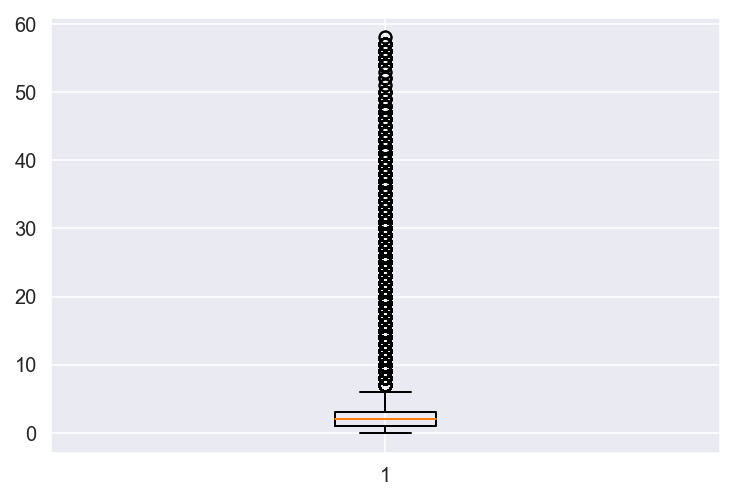

In [38]:
plt.boxplot((df.DisbursementDate - df.ApprovalDate).astype('timedelta64[M]'))

In [39]:
# there are still a lot of outliers. for disbursement>24, delete as there is prob some error in the
# data anyway
df[(df.DisbursementDate - df.ApprovalDate).astype('timedelta64[M]')>24].Name.count()

710

In [40]:
df = df[~((df.DisbursementDate - df.ApprovalDate).astype('timedelta64[M]')>24)]

In [41]:
# change franchise to got franchise (1) or no franchise (0). 
df['franchise'] = np.where((df.FranchiseCode==1)|(df.FranchiseCode==0), 0,1)

In [42]:
df.drop('FranchiseCode', axis=1, inplace=True)

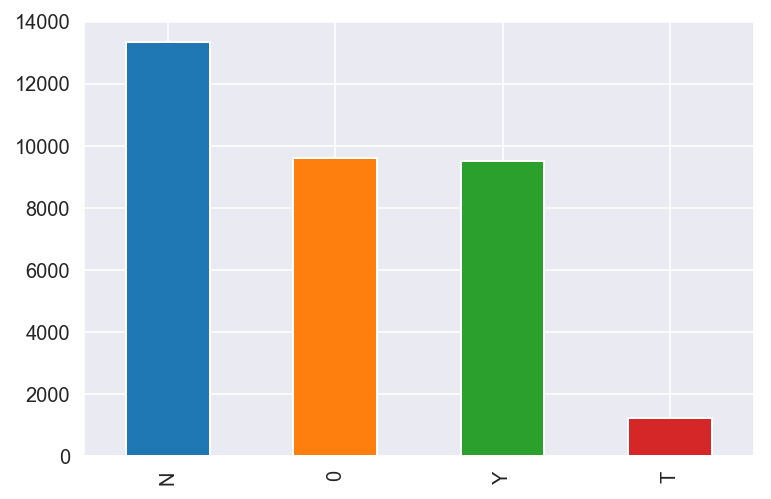

In [43]:
# investigate revolving credit lines
df.RevLineCr.value_counts().plot(kind='bar')

In [44]:
# there are lots of zeroes and Ts, which are not defined. we'll assume there are NO lines
# of credit unless specifically coded 'Y'
df['lineofcredit'] = np.where(df.RevLineCr == 'Y', 1, 0)

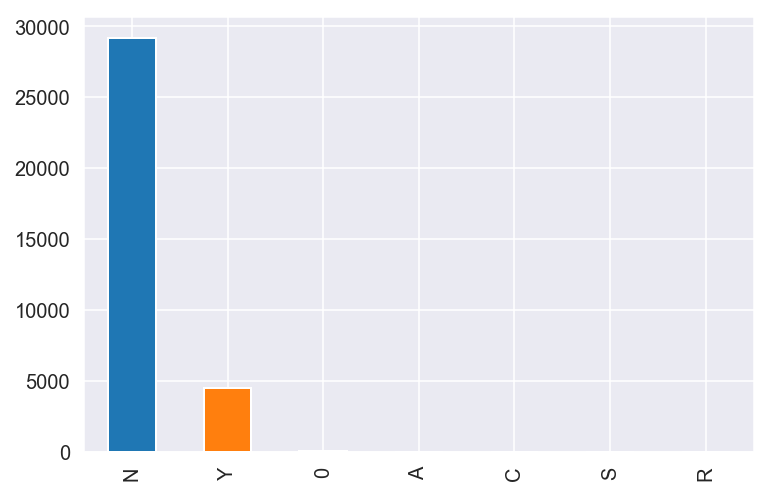

In [45]:
# A No-Doc or Low-doc loan (abbr: No/Low Documentation Loan) refers to loans that do not 
#require borrowers to provide documentation of their income to lenders or do not require 
#much documentation. 
df.LowDoc.value_counts().plot(kind='bar')

In [46]:
df['lowdocs'] = np.where(df.LowDoc=='Y', 1, 0)

In [47]:
df.drop(['LowDoc', 'RevLineCr'], axis=1, inplace=True)

In [48]:
df.select_dtypes(['number'])[:5]

,Zip,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,default,franchise,lineofcredit,lowdocs
ID,,,,,,,,,,,,,,,,
1000714001,19081,42,2,1.0,0,0,0,1500000.0,0.0,0.0,1500000.0,1200000.0,0,0,0,1
1000824010,19034,84,5,2.0,0,0,0,3500000.0,0.0,0.0,3500000.0,2800000.0,0,0,0,1
1001725002,19047,60,2,1.0,0,0,0,5500000.0,0.0,0.0,5500000.0,2750000.0,0,0,0,0
1001785009,19611,18,3,0.0,0,0,0,2000000.0,0.0,0.0,2000000.0,1000000.0,0,0,0,0
1001885004,19611,84,46,1.0,0,0,0,10000000.0,0.0,0.0,10000000.0,5000000.0,0,1,0,0


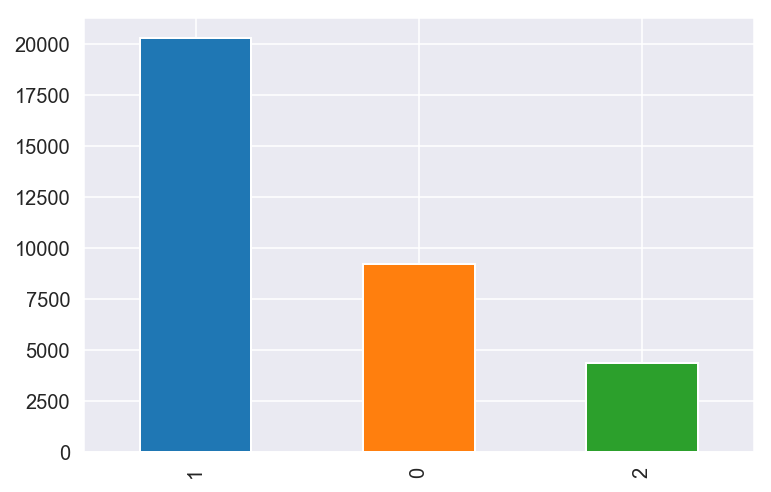

In [49]:
df.UrbanRural.value_counts().plot(kind='bar')

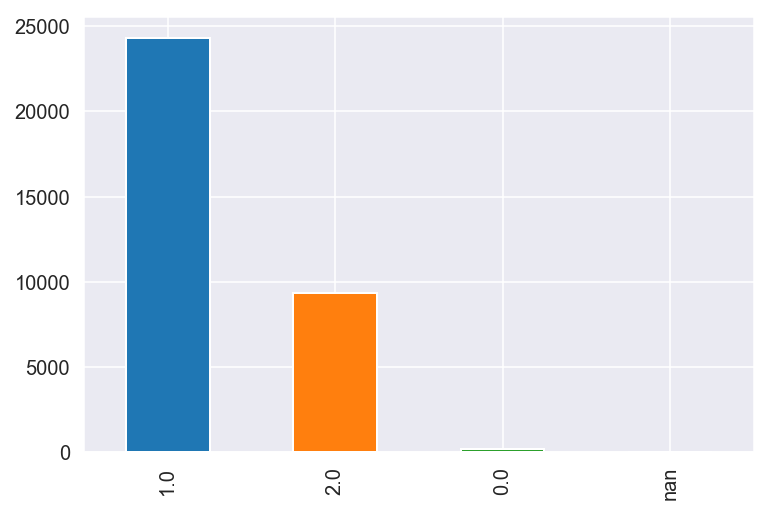

In [50]:
# 1 for existing biz, 2 for new (<2yrs). change to 1 and 0 with existing zeroes and NAs lumped into
#'new' category 
df.NewExist.value_counts(dropna=False).plot(kind='bar')

In [51]:
df['newbiz'] = df.NewExist.map({1: 0, 2:1, 0:1, np.nan:1})

In [52]:
df.drop('NewExist', axis=1, inplace=True)

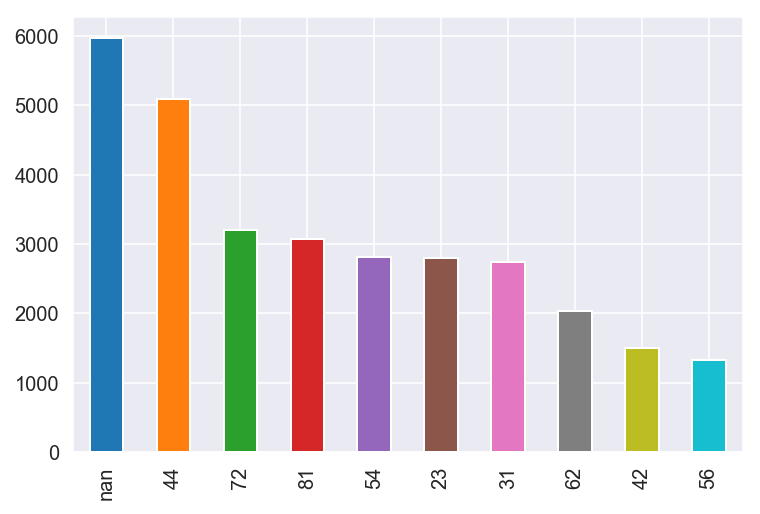

In [53]:
df.sector.value_counts(dropna=False)[:10].plot(kind='bar')

In [54]:
# recession Mar 2001-Nov 2001, Dec 2007-June 2009, Nov 1973-Mar 1975, July 1981-Nov 1982
#July 1990-Mar 1991, Jan 1980-July 1980 per NBER - altogether SIX of them
# to create a recession variable (which is an impt default determinant), 
#we need to know if a loan still outstanding when a recession hit. 

In [55]:
# check for intersection of time range with recessions
import dateutil.parser

recession1s = dateutil.parser.parse("2001-03-01", ignoretz=True)
recession1e = dateutil.parser.parse("2001-11-30", ignoretz=True)
recession2s = dateutil.parser.parse("2007-12-01", ignoretz=True)
recession2e = dateutil.parser.parse("2009-06-30", ignoretz=True)
recession3s = dateutil.parser.parse("1973-11-01", ignoretz=True)
recession3e = dateutil.parser.parse("1975-03-30", ignoretz=True)
recession4s = dateutil.parser.parse("1981-07-01", ignoretz=True)
recession4e = dateutil.parser.parse("1982-11-30", ignoretz=True)
recession5s = dateutil.parser.parse("1990-07-01", ignoretz=True)
recession5e = dateutil.parser.parse("1991-03-30", ignoretz=True)
recession6s = dateutil.parser.parse("1980-01-01", ignoretz=True)
recession6e = dateutil.parser.parse("1980-07-30", ignoretz=True)

In [56]:
# check if chgoffdates exceed loan expiry dates
print(df[df.ChgOffDate > df.loanend].default.value_counts())
print(df.default.value_counts())


1    2982
Name: default, dtype: int64
0    28783
1     5064
Name: default, dtype: int64


In [57]:
# column for lower of charge off date or loan expiry date
df['dtrange'] = np.where(df.ChgOffDate.isnull(), df.loanend, df.ChgOffDate)
df['dtrange'] = np.where(df.loanend > df.dtrange, df.dtrange, df.loanend)
df.dtrange = df.dtrange.values.astype('datetime64[D]')

In [58]:
df.dtrange.head()

ID
1000714001   2000-09-29
1000824010   2005-06-29
1001725002   2003-01-31
1001785009   1999-10-29
1001885004   2005-02-27
Name: dtrange, dtype: datetime64[ns]

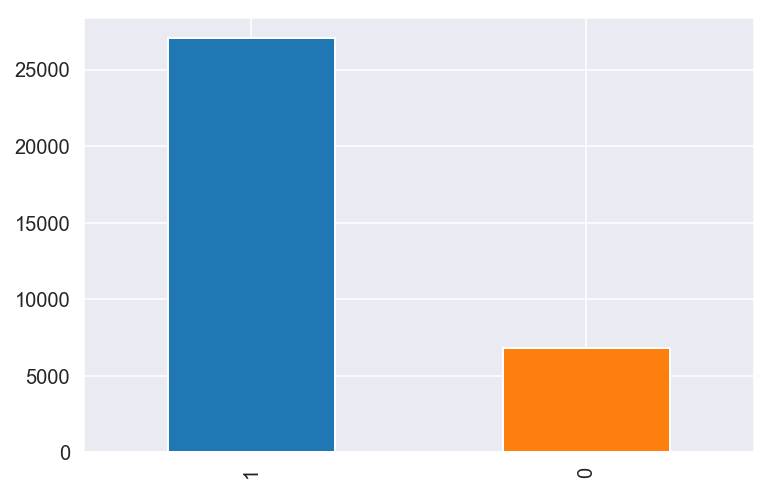

In [59]:
# code variable recession where loans periods intersect with recessions
df['recession'] = np.where((df.dtrange >= recession1s) &(df.DisbursementDate <= recession1e), 1,0)
df['recession'] = np.where((df.dtrange >= recession2s) &(df.DisbursementDate <= recession2e), 1,df.recession)
df['recession'] = np.where((df.dtrange >= recession3s) &(df.DisbursementDate <= recession3e), 1,df.recession)
df['recession'] = np.where((df.dtrange >= recession4s) &(df.DisbursementDate <= recession4e), 1,df.recession)
df['recession'] = np.where((df.dtrange >= recession5s) &(df.DisbursementDate <= recession5e), 1,df.recession)
df['recession'] = np.where((df.dtrange >= recession6s) &(df.DisbursementDate <= recession6e), 1,df.recession)

df.recession.value_counts().plot(kind='bar')

In [60]:
df[(df.dtrange < df.DisbursementDate)]

,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,sector,default,MoApproved,loanend,franchise,lineofcredit,lowdocs,newbiz,dtrange,recession
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [61]:
df = df[~(df.dtrange < df.DisbursementDate)]

In [62]:
# accordign to the documentation, term loans of >240 months or 20 years have to be backed by 
# real estate. therefore let's create a dummy variable 'REbacked'
df[df.Term>=240].Term.count()

2483

In [63]:
df['REbacked'] = np.where(df.Term>=240, 1,0)

In [64]:
# create variable for interstate loan (ie business state != bank state)
print(df.BankState.isnull().sum())

107


In [65]:
df[(df.BankState.isnull())&(~df.Bank.isnull())]

,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,sector,default,MoApproved,loanend,franchise,lineofcredit,lowdocs,newbiz,dtrange,recession,REbacked
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [66]:
# create entry 'foreign' for these if applicable
df.BankState = np.where((df.BankState.isnull())&(~df.Bank.isnull()), 'NonUS', df.BankState)

In [67]:
df[(df.BankState.isnull())&(df.Bank.isnull())].Name.count()

107

In [68]:
# since there are only 100+ entries, assume bankstate = state
df.BankState = np.where(df.BankState.isnull(), df.State, df.BankState)

In [69]:
# explore city and zip codes
df.City = df.City.str.strip()

In [70]:
df.Zip = df.Zip.astype(str)

In [71]:
# let's take a look at the types of incomplete zipcodes
df[df.Zip.apply(lambda x: len(x)!=5)].Zip.sample(5)

ID
3754464004    7701
5520344010    5209
8955543007    8060
5436373009    8002
3450644000    1934
Name: Zip, dtype: object

In [72]:
# fix postcodes with '0' missing in front
for x in df.index:
    zip = df.loc[x,'Zip']
    if len(str(zip)) ==4:
        zip = '0'+str(zip)
        df.loc[x,'Zip'] == zip


In [73]:
# for all the others, we have to pull zipcodes using uszipcode library
search = SearchEngine()
for x in df.index:
    zip = df.loc[x,'Zip']
    if len(zip)!=5:
        try:
            addzip = search.by_city_and_state(df.loc[x, 'City'], "PA")[0].zipcode
            df.loc[x,'Zip'] == addzip
        except:
            df.loc[x, 'Zip'] =='None'
            pass

In [74]:
ziplist = list(set(df.Zip))
len(ziplist)

1788

In [75]:
# check if there were any errors with the zip search
'None' in ziplist

False

In [76]:
# additionally, let's try to extract the county name assoc w zipcode to later create an 'income' var
zipdict = {}
for z in ziplist:
    try:
        county = search.by_zipcode(z).county
        county = county.replace('County', '').strip()
    except:
        try:
            county = search.by_city_and_state(df.loc[x, 'City'], "PA")[0].county
            county = county.replace('County', '').strip()
        except:
            pass
    else:
        pass
    zipdict[z] = county

In [77]:
df['county'] = df.Zip.map(zipdict)

In [78]:
df[df.county.isnull()]

,Name,City,State,Zip,Bank,BankState,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,sector,default,MoApproved,loanend,franchise,lineofcredit,lowdocs,newbiz,dtrange,recession,REbacked,county
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<p>now get info from wiki on median household income for each county. 
<p>limitations of data:
<ul><li> extracted from 2010 US census, and not from particular year loan approved / disbursed. we assume relative income levels have remained the same over time (ie the rich counties have not gotten poorer and vice versa)
    

In [79]:
# scraping done in separate notebook. dict pulled to map incomes to counties here.
%store -r hhdict 

In [80]:
df['medincome'] = df.county.map(hhdict)

In [81]:
# let's investigate the reason medincome is null.
df[df.medincome.isnull()][['medincome', 'Zip', 'City', 'county']][:5]

,medincome,Zip,City,county
ID,,,,
1311876003,NaN,19808,READING,New Castle
1526344002,NaN,7439,ALLENTOWN,Sussex
1529994004,NaN,14008,BROOMALL,Niagara
1594186007,NaN,61025,LANSDOWNE,Jo Daviess
1650734009,NaN,19702,NEWARK,New Castle


In [82]:
df.medincome.isnull().sum()

85

In [83]:
# it looks like the zips are not pointing to the correct counties. let's use city instead
for x in df[df.medincome.isnull()].index:
    try:
        county = search.by_city_and_state(df.loc[x,'City'], 'pa')[0].county
        county = county.replace('County', '').strip()
        df.loc[x, 'county'] = county
    except:
        df.loc[x, 'county'] = 'None'
        pass
    

In [84]:
# check to see if county names have changed. they have!
df[df.medincome.isnull()][['medincome', 'Zip', 'City', 'county']][:5]

,medincome,Zip,City,county
ID,,,,
1311876003,NaN,19808,READING,Berks
1526344002,NaN,7439,ALLENTOWN,Lehigh
1529994004,NaN,14008,BROOMALL,Delaware
1594186007,NaN,61025,LANSDOWNE,Delaware
1650734009,NaN,19702,NEWARK,York


In [85]:
# check for empty 'county' values. 
df[df.county=='None'].county.count()

7

In [86]:
# since there are only a few let's assign these to the most commonly occurring county.
topcounty = df.county.value_counts()[:1].index[0]
df.county = np.where(df.county=='None', topcounty, df.county)

In [87]:
# map revised county names to income dictionary
df['medincome'] = df.county.map(hhdict)

In [88]:
# check for nulls
df.medincome.isnull().sum()

0

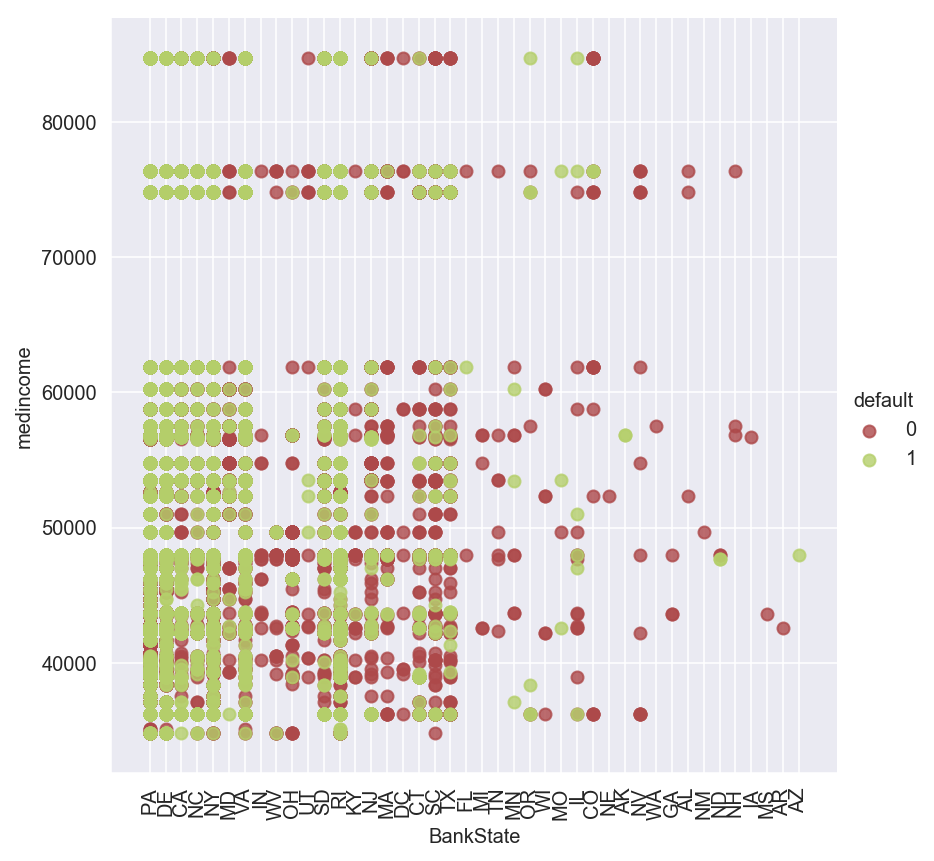

In [89]:
g = sns.lmplot(x = 'BankState', y = 'medincome', data = df, hue='default', \
           size = 6, fit_reg = False, palette = 'tab20b_r')
g.set_xticklabels(rotation=90)

<li>from above, there seems to be no strong relationship between median income and defaults, as they happen even in counties where median income levels are the highest. 
    <li>however, there does seem to be a relationship between the location state of bank and the level of defaults. 

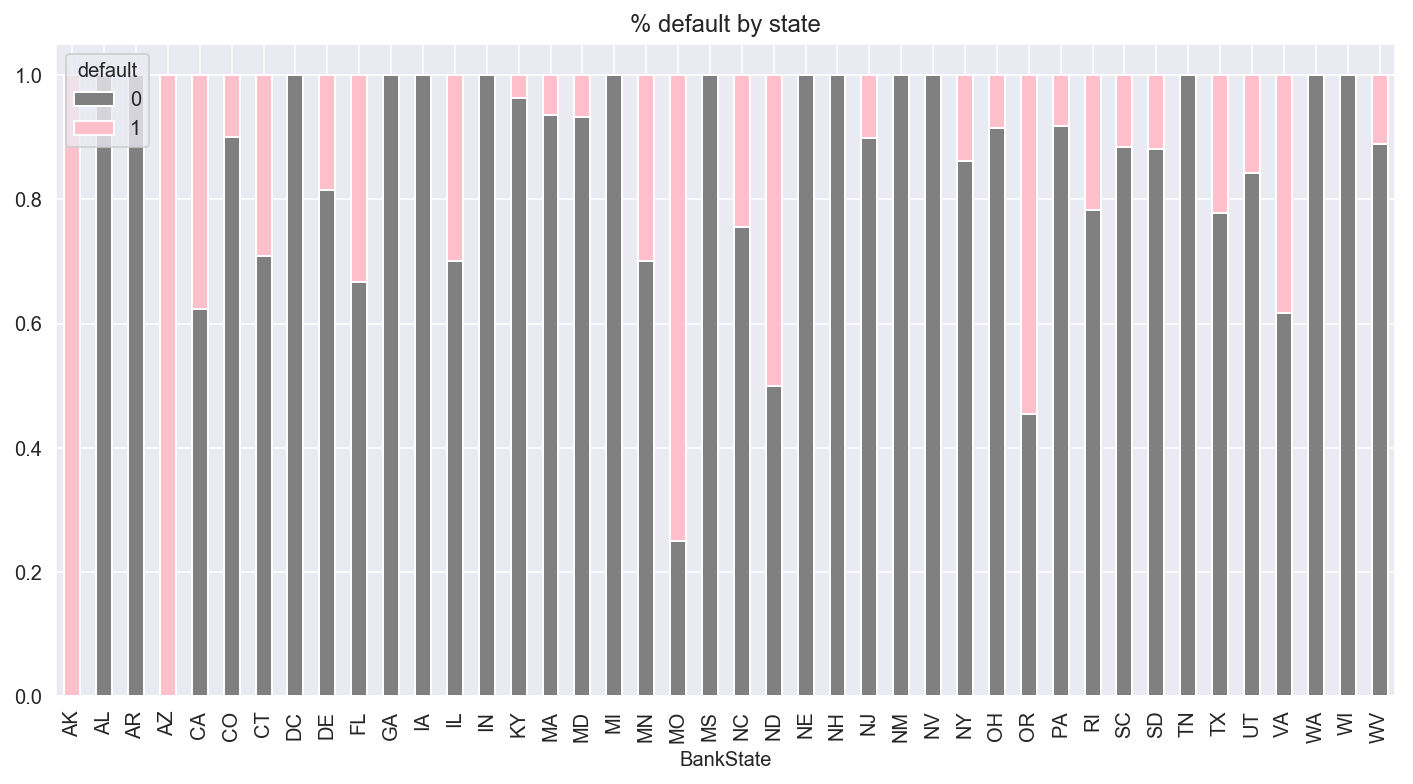

In [90]:
# stacked bar plot showing default rates by Bank location state
pct = df.groupby(['BankState', 'default'])['default'].count()/df.groupby('BankState')['default'].count()
grouped = pct.unstack('default').fillna(0)

grouped.plot(kind='bar', stacked=True, figsize=(12,6), title='% default by state', color=['grey', 'pink'], sort_columns=True)

In [110]:
grouped2 = grouped.drop(['AZ','AK','AL', "AR", 'MS', 'NH', 'TN', 'WA', 'MI', 'WI', "NM", 'IN', 'GA', 'NV', 
                         'KY', 'CO','WV', 'SC','SD', 'UT','DC', 'IA', 'NE', 'IL', 'FL', 'ND'], axis=0)

In [111]:
grouped2 = grouped2.sort_values(by=1)


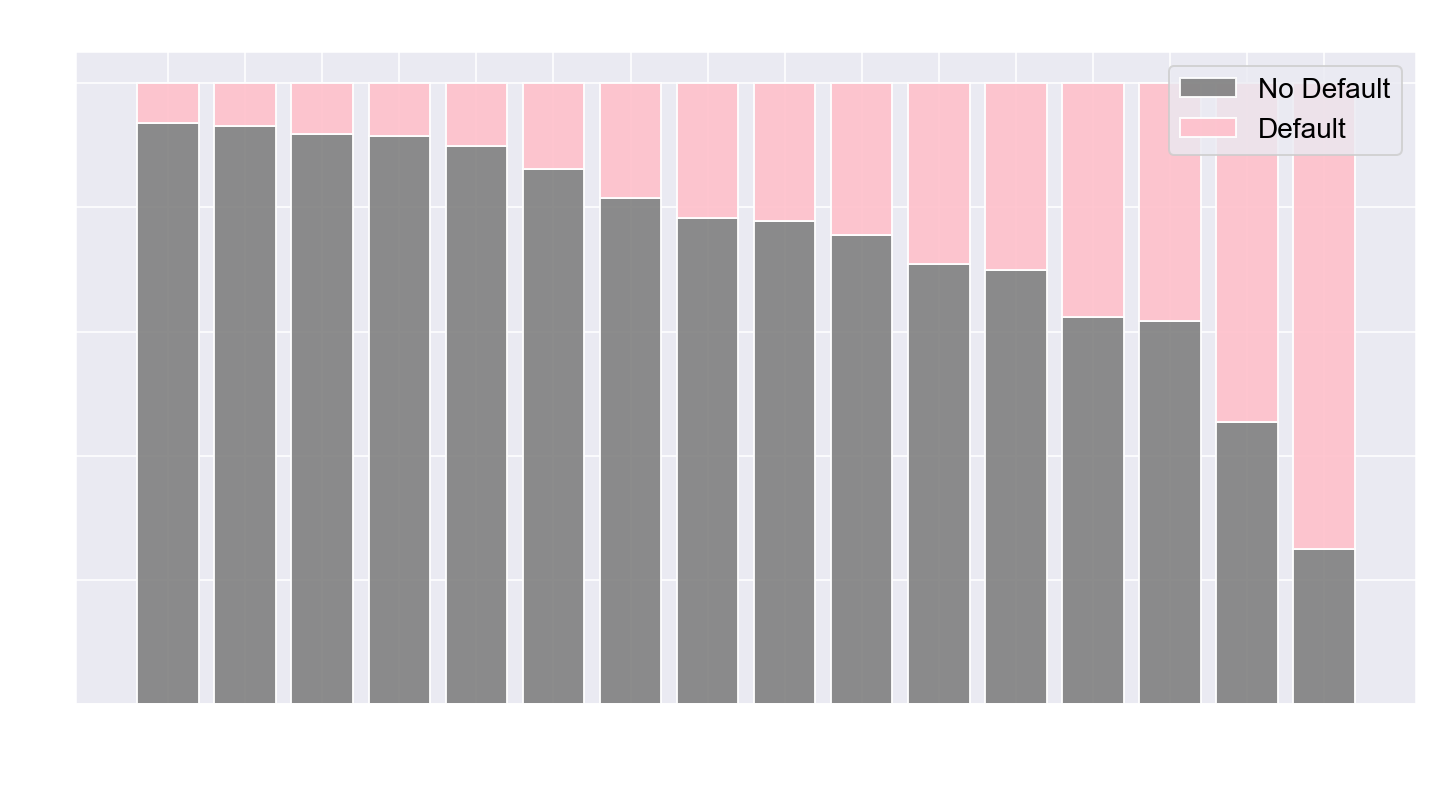

In [154]:
#grouped2.plot(kind='bar', stacked=True, figsize=(12,6), title='Percentage Default by Bank-Domiciled State', 
 #             color=['grey', 'pink'], sort_columns=True)

plt.figure(figsize=(12,6))
plt.bar(grouped2.index, grouped2[0],  alpha=0.9, color='grey')
plt.bar(grouped2.index,grouped2[1],bottom=grouped2[0], alpha=0.9, color='pink')
plt.xticks(color='white', rotation=90, fontsize=14)
plt.yticks(color='white', fontsize=14)
plt.xlabel('Selected States', fontsize = 14, color='white')
plt.ylabel('Percentage default', fontsize = 1, color='white')
leg = plt.legend(['No Default', 'Default'], fontsize = 14)
for text in leg.get_texts():
    plt.setp(text, color = 'black')
plt.title('Percentage Default by Bank Domiciled State', fontsize=18, color='white')
plt.show()

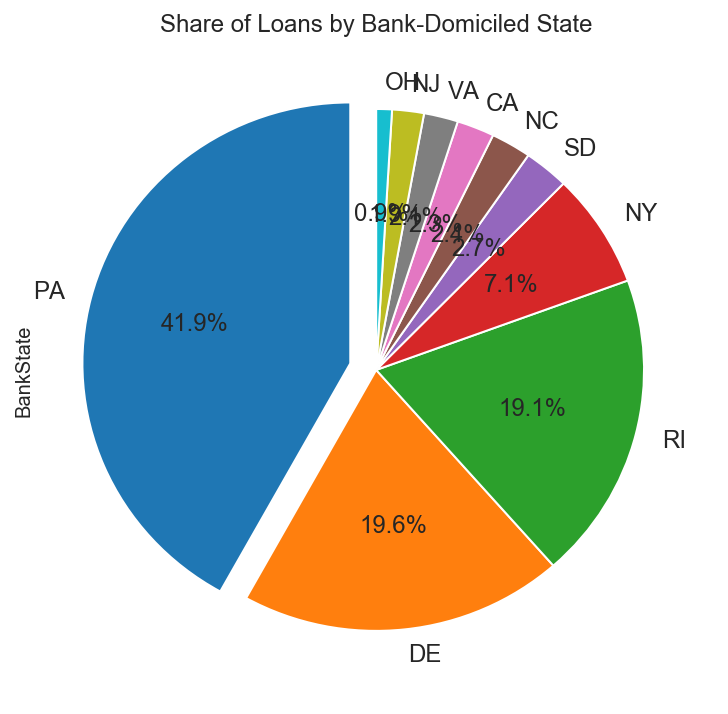

In [138]:
explodetuple= (0.1,0,0,0,0,0,0,0,0,0 )
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
df.BankState.value_counts()[:10].plot(kind='pie', explode=explodetuple, ax = ax, autopct='%1.1f%%', startangle=90, fontsize=12,
                                     title='Share of Loans by Bank-Domiciled State')
plt.show()

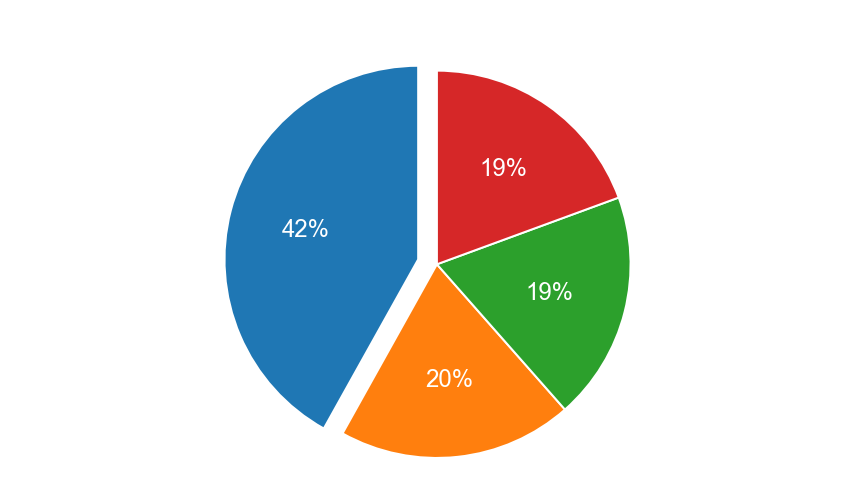

In [155]:
# nice graph for presentation

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#FFFFFF'
plt.rcParams['axes.labelcolor']= '#FFFFFF'
plt.rcParams['xtick.color'] = '#FFFFFF'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['Pennsylvania (PA)', 
         'Delaware (DE)', 'Rhode Island (RI)', 'Others']
percentages = [41.9, 19.6, 19.1,19.4 ]
explode=(0.1,0,0,0)
ax.pie(percentages, explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=90)
ax.axis('equal')
ax.set_title("Share of Loans by Bank-Domiciled State", color='white')
#ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [156]:
df.drop(['Bank', 'Zip', 'City'], axis=1, inplace=True)

In [157]:
# investigate employee count
df.NoEmp.describe()

count    33847.000000
mean        11.008627
std        101.253350
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max       9992.000000
Name: NoEmp, dtype: float64

In [158]:
df[df.NoEmp==0].NoEmp.count()

289

In [159]:
# a business should have at least 1 employee (owner)
df.NoEmp = np.where(df.NoEmp==0, 1, df.NoEmp)

In [160]:
df.isnull().sum()

Name                     1
State                    0
BankState                0
ApprovalDate             0
ApprovalFY           28094
Term                     0
NoEmp                    0
CreateJob                0
RetainedJob              0
UrbanRural               0
ChgOffDate           28785
DisbursementDate         0
DisbursementGross        0
BalanceGross             0
ChgOffPrinGr             0
GrAppv                   0
SBA_Appv                 0
sector                5967
default                  0
MoApproved               0
loanend                  0
franchise                0
lineofcredit             0
lowdocs                  0
newbiz                   0
dtrange                  0
recession                0
REbacked                 0
county                   0
medincome                0
dtype: int64

In [161]:
df.Name = np.where(df.Name.isnull(), 'Unknown', df.Name)

In [162]:
# code variable for SBA vs total loan %
df['SBAgtee'] = df.SBA_Appv/df.GrAppv 

In [163]:
df.SBAgtee.describe()

count    33847.000000
mean         0.654053
std          0.164521
min          0.080000
25%          0.500000
50%          0.500000
75%          0.800000
max          1.000000
Name: SBAgtee, dtype: float64

In [164]:
df.Term.describe()

count    33847.000000
mean        89.899991
std         62.390719
min          0.000000
25%         60.000000
50%         84.000000
75%         97.000000
max        360.000000
Name: Term, dtype: float64

In [165]:
df.dtypes

Name                         object
State                        object
BankState                    object
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
CreateJob                     int64
RetainedJob                   int64
UrbanRural                    int64
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
sector                       object
default                       int64
MoApproved                   object
loanend              datetime64[ns]
franchise                     int32
lineofcredit                  int32
lowdocs                       int32
newbiz                        int64
dtrange              datetime64[ns]
recession                     int32
REbacked                    

In [166]:
# let's explore approval year - there are lots of missing values. 
#are there diff in loans approved just before major recessions?
df[~df.ApprovalFY.isnull()][['ApprovalFY', 'ApprovalDate']].sample(10)

,ApprovalFY,ApprovalDate
ID,,
7653344002,2004,2004-07-30
7952233008,1995,1995-01-03
7661274005,2004,2004-08-02
7601973005,1994,1994-09-22
7940933009,1995,1994-12-27
8477803007,1995,1995-07-03
7465914010,2004,2004-05-25
7319584009,2004,2004-04-01
8688383001,1995,1995-09-28


In [167]:
# US fiscal year starts in calendar Q4 of previous year, and the sample above seems to bear this out.
# let's fill all the other null values
df.ApprovalFY = np.where((df.ApprovalFY.isnull())&(df.ApprovalDate.dt.month<10), df.ApprovalDate.dt.year,df.ApprovalFY)
df.ApprovalFY = np.where((df.ApprovalFY.isnull())&(df.ApprovalDate.dt.month>9), df.ApprovalDate.dt.year+1,df.ApprovalFY)
df.ApprovalFY = df.ApprovalFY.astype(int)

In [168]:
df[['ApprovalFY', 'ApprovalDate']].sample(10)

,ApprovalFY,ApprovalDate
ID,,
6687384007,2003,2003-09-15
4971124008,2002,2001-10-10
5338994010,2002,2002-04-15
3312404000,2000,1999-10-27
7371104002,2004,2004-04-20
3204144008,1999,1999-09-27
4574143003,1991,1991-09-06
7294004002,2004,2004-03-24
1578695000,2006,2005-12-13


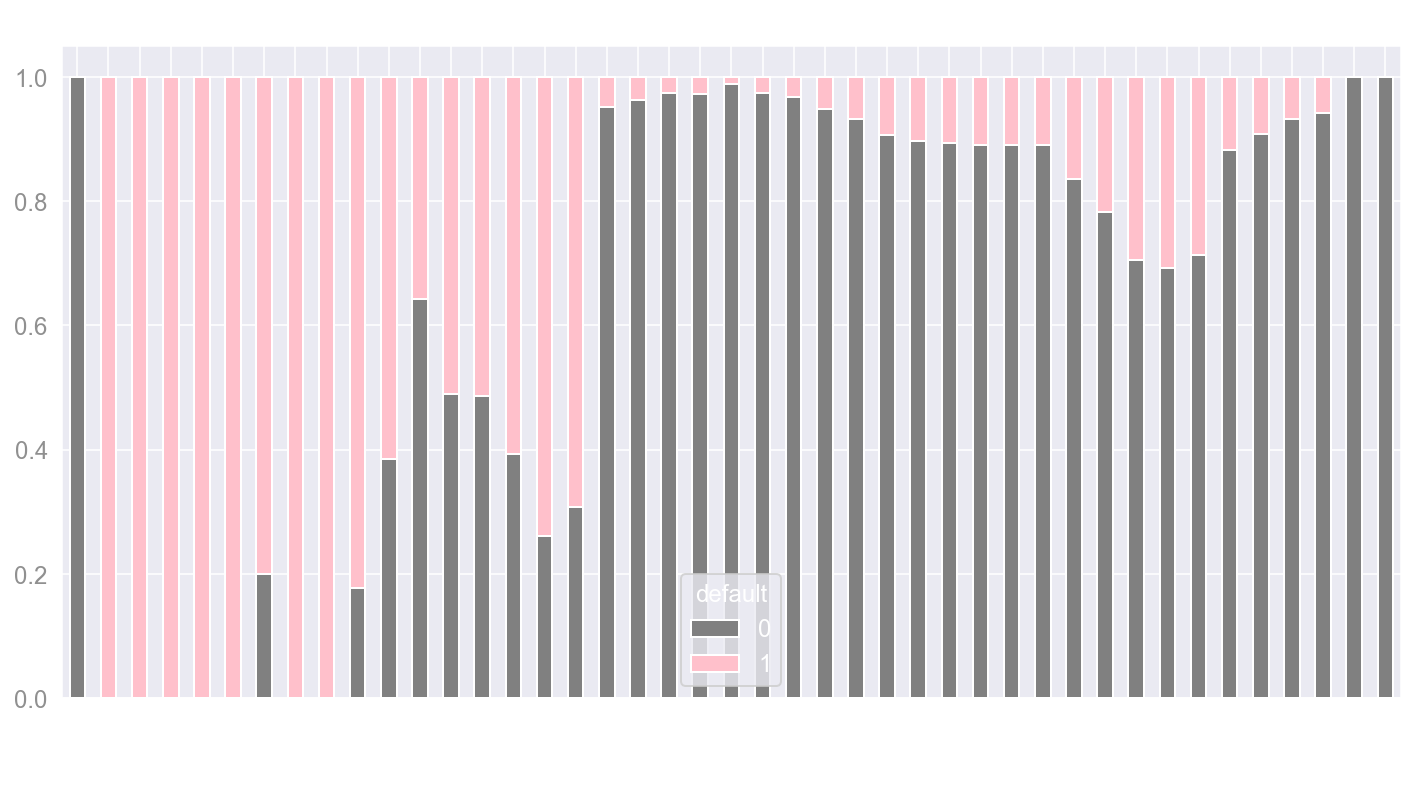

In [169]:
# stacked bar plot showing default rates by approval year
pct = df.groupby(['ApprovalFY', 'default'])['default'].count()/df.groupby('ApprovalFY')['default'].count()
grouped = pct.unstack('default').fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(12,6), title='% default by Loan Approval Year', color=['grey', 'pink'])
                                                                                                        

In [170]:
# lots of % defaults prior to the 1990s! the data look funny though, as some show 100% defaults by approval year

In [173]:
# let's just concentrate on loans made after 1970 (one outlier from plot above)
df = df[~df.ApprovalDate.dt.year<1970]

In [174]:
# year by itself is not meaningful. let's group approval year into bins of 5 over the 15 year period 
# that loans were issued
df['FYA70-74'] = np.where((df.ApprovalFY>=1970)&(df.ApprovalFY<1975), 1, 0)
df['FYA75-79'] = np.where((df.ApprovalFY>=1975)&(df.ApprovalFY<1980), 1, 0)
df['FYA80-84'] = np.where((df.ApprovalFY>=1980)&(df.ApprovalFY<1985), 1, 0)
df['FYA85-89'] = np.where((df.ApprovalFY>=1985)&(df.ApprovalFY<1990), 1, 0)
df['FYA90-94'] = np.where((df.ApprovalFY>=1990)&(df.ApprovalFY<1995), 1, 0)
df['FYA95-99'] = np.where((df.ApprovalFY>=1995)&(df.ApprovalFY<2000), 1, 0)
df['FYA00-04'] = np.where((df.ApprovalFY>=2000)&(df.ApprovalFY<2005), 1, 0)
df['FYA05-09'] = np.where((df.ApprovalFY>=2005)&(df.ApprovalFY<2010), 1, 0)
df['FYA10-14'] = np.where((df.ApprovalFY>=2010)&(df.ApprovalFY<2015), 1, 0)

In [229]:
# convert dates to fractions of year
from datetime import datetime
rlist = []
for n in np.arange(1,7,1):
    for p in ['s', 'e']:
        d = 'recession'+ str(n)+p
        d = globals()[d]
        rlist.append( (float(d.strftime("%j"))-1) / 366 + float(d.strftime("%Y")))
rlist

[2001.1612021857923,
 2001.9098360655737,
 2007.9125683060108,
 2009.4918032786886,
 1973.8306010928961,
 1975.24043715847,
 1981.4945355191257,
 1982.9098360655737,
 1990.4945355191257,
 1991.24043715847,
 1980.0,
 1980.5765027322404]

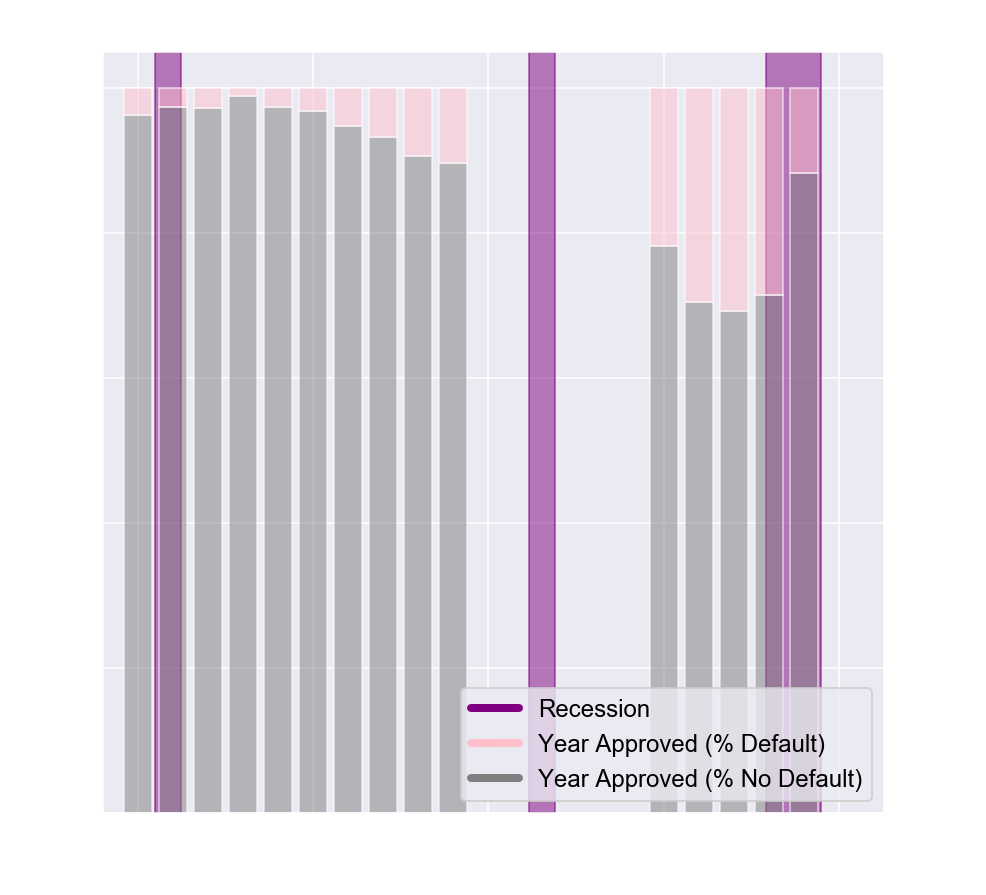

In [278]:
# nice graph for preso - Relationship between Recessions and Loan Approval Years

plt.figure(figsize=(7,7))
plt.title('Relationship between Recessions and Loan Approval Years', color='white', fontsize= 18)
#plt.hist(grouped.iloc[:,1], bins=l, stacked=False, alpha=0.5)

for n in np.arange(6):
    plt.axvspan(rlist[2*n],rlist[2*n+1], alpha=0.5, color='purple')
    
plt.bar(grouped.loc['2005':'2009', :].index,grouped.loc['2005':'2009', 0],  alpha=0.5, color='grey')
plt.bar(grouped.loc['2005':'2009', :].index,grouped.loc['2005':'2009', 1], bottom =grouped.loc['2005':'2009', 0],
         alpha=0.5, color='pink')

plt.bar(grouped.loc['1990':'1999', :].index,grouped.loc['1990':'1999', 0],  alpha=0.5, color='grey')
plt.bar(grouped.loc['1990':'1999', :].index,grouped.loc['1990':'1999', 1], bottom =grouped.loc['1990':'1999', 0],
         alpha=0.5, color='pink')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='purple', lw=4),
                Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='grey', lw=4)]

leg = plt.legend(custom_lines, ['Recession', 'Year Approved (% Default)', 'Year Approved (% No Default)'])

for text in leg.get_texts():
    plt.setp(text, color = 'black')
plt.xlabel('Year')
plt.ylabel('% Total Loans')
plt.xticks(np.arange(1990, 2015, 5))
plt.yticks(color='white')
plt.xlim(left=1989)

plt.show()

In [214]:
pd.set_option('float_format', '{:f}'.format)
df.GrAppv.describe()

count       33847.000000
mean     14288543.876858
std      23244954.663960
min        100000.000000
25%       3000000.000000
50%       6300000.000000
75%      15000000.000000
max     500000000.000000
Name: GrAppv, dtype: float64

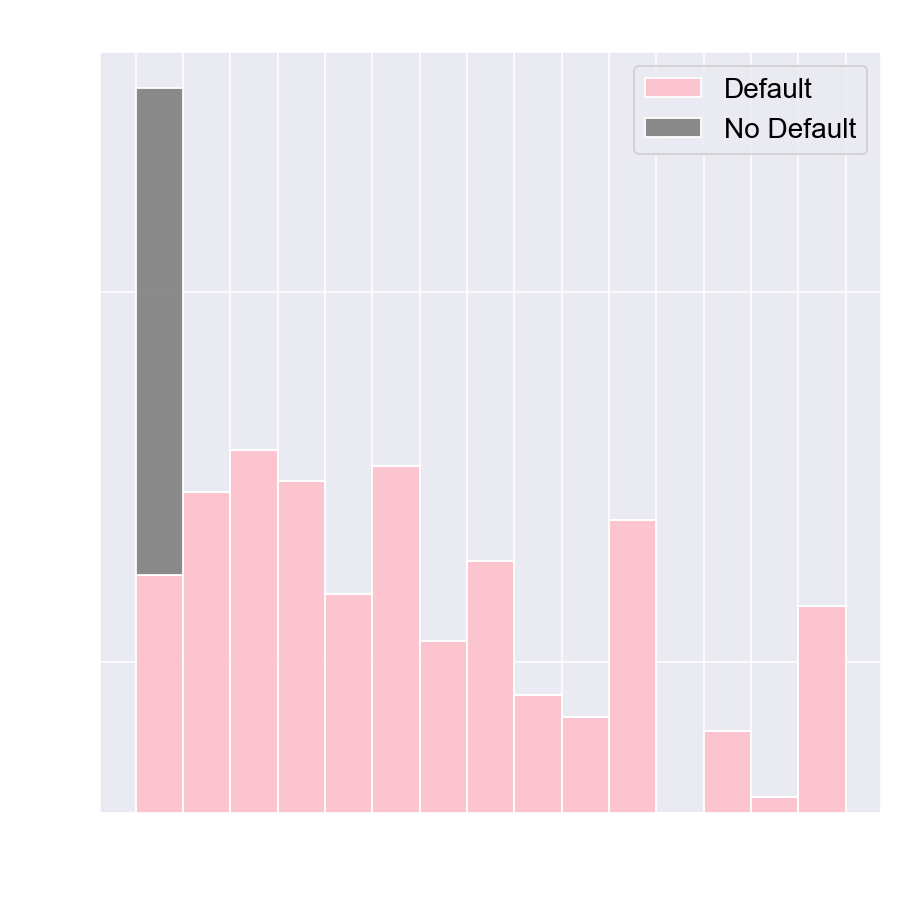

In [225]:
# stacked bar plot - loans by loan quantum
l = np.arange(0, 16000000, 1000000)
x = [n/1000000 for n in l]

plt.figure(figsize=(7,7))
plt.hist([df.GrAppv, df.default], bins=l, stacked=True, alpha=0.9, color=['pink', 'grey'], log=True)

plt.xticks(l, x, color='white')
plt.yticks(color='white')
plt.xlabel('Loan Amount ($ millions)', fontsize = 14, color='white')
plt.ylabel('Frequency', fontsize = 14, color='white')

leg = plt.legend(['Default', 'No Default'], fontsize = 14)
for text in leg.get_texts():
    plt.setp(text, color = 'black')
    
plt.title('Defaults by Loan Quantum (Log Scale)', fontsize=18, color='white')
plt.show()

In [178]:
# the larger loans seem to have a poorer chance of survival! 

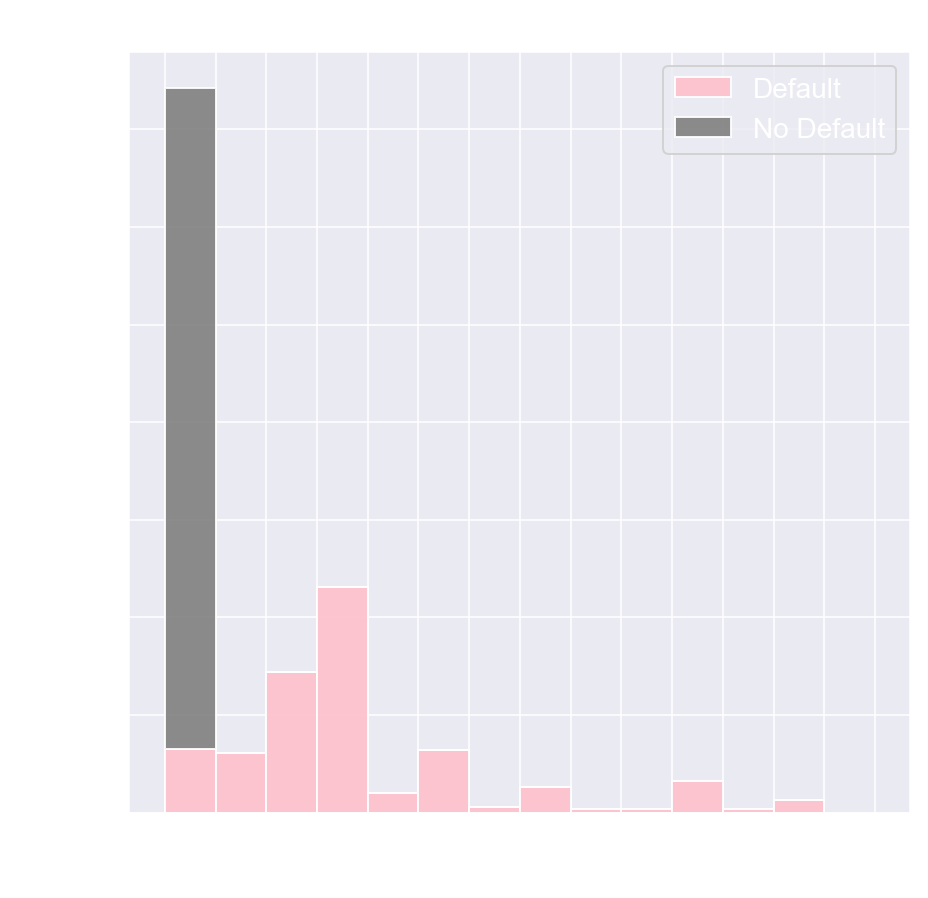

In [179]:
# stacked bar plot
l = np.arange(0,360, 24)
x = np.arange(0, 30,2)

plt.figure(figsize=(7,7))
plt.hist([df.Term, df.default], bins=l, stacked=True, alpha=0.9, color=['pink', 'grey'])
plt.xticks(l, x, color='white')
plt.yticks(color='white')
plt.xlabel('Years', fontsize = 14, color='white')
plt.ylabel('Count', fontsize = 14, color='white')
plt.legend(['Default', 'No Default'], fontsize = 14)
plt.title('Defaults by Loan Tenor', fontsize=18, color='white')
plt.show()

In [180]:
# it looks like defaults peak around 5-7 years into loan, and most defaults occur for really 
# short-dated loans!

In [181]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr','GrAppv','SBA_Appv']][:10]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
ID,,,,,
1000714001,1500000.0,0.0,0.0,1500000.0,1200000.0
1000824010,3500000.0,0.0,0.0,3500000.0,2800000.0
1001725002,5500000.0,0.0,0.0,5500000.0,2750000.0
1001785009,2000000.0,0.0,0.0,2000000.0,1000000.0
1001885004,10000000.0,0.0,0.0,10000000.0,5000000.0
1001905008,10000000.0,0.0,0.0,10000000.0,5000000.0
1001915000,10000000.0,0.0,0.0,10000000.0,5000000.0
1001965004,8000000.0,0.0,0.0,8000000.0,4000000.0
1001995002,10000000.0,0.0,0.0,10000000.0,5000000.0


<li>disbursements are exactly equal to gross approved. can be deleted
<li>grappv and sba_appv have been combined into a ratio, so these can be deleted as well
<li>balancegross does not seem to add much value. delete.
    <li>anything related or contributing to calculation of the target variable should be deleted (like 'chgoffpringr' and 'chgoffdate').

In [182]:
coltodelete = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr' ,'SBA_Appv', 'State']
df.drop(coltodelete, axis=1, inplace=True)

In [183]:
datestodel = ['ApprovalDate', 'ApprovalFY','ChgOffDate', 'DisbursementDate'  , 'loanend', 'dtrange']
df.drop(datestodel, axis=1, inplace=True)

In [184]:
df.shape

(33847, 29)

In [185]:
df.default.value_counts()

0    28783
1     5064
Name: default, dtype: int64

In [186]:
df.head()

,Name,BankState,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,GrAppv,sector,default,MoApproved,franchise,lineofcredit,lowdocs,newbiz,recession,REbacked,county,medincome,SBAgtee,FYA70-74,FYA75-79,FYA80-84,FYA85-89,FYA90-94,FYA95-99,FYA00-04,FYA05-09,FYA10-14
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000714001,HUGH GIBBONS PLUMBING AND HEAT,PA,42,2,0,0,0,1500000.0,44,0,Q2,0,0,1,0,0,0,Delaware,61876.0,0.8,0,0,0,0,0,1,0,0,0
1000824010,AADVANTAGE INSURANCE & FINANCI,PA,84,5,0,0,0,3500000.0,52,0,Q2,0,0,1,1,1,0,Montgomery,76380.0,0.8,0,0,0,0,0,1,0,0,0
1001725002,Faust Funeral Home Inc,PA,60,2,0,0,0,5500000.0,NaN,0,Q4,0,0,0,0,1,0,Bucks,74828.0,0.5,0,0,0,0,0,1,0,0,0
1001785009,West Reading Used Furniture,PA,18,3,0,0,0,2000000.0,NaN,0,Q1,0,0,0,1,0,0,Berks,53470.0,0.5,0,0,0,0,0,1,0,0,0
1001885004,REYNOLDS H20 PLUS,PA,84,46,0,0,0,10000000.0,NaN,0,Q1,1,0,0,0,1,0,Berks,53470.0,0.5,0,0,0,0,0,1,0,0,0


In [187]:
df.to_pickle('./loancleaned.pkl')

In [188]:
df = pd.read_pickle('./loancleaned.pkl')

In [189]:
df.shape

(33847, 29)

In [190]:
df.columns

Index(['Name', 'BankState', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'UrbanRural', 'GrAppv', 'sector', 'default', 'MoApproved', 'franchise',
       'lineofcredit', 'lowdocs', 'newbiz', 'recession', 'REbacked', 'county',
       'medincome', 'SBAgtee', 'FYA70-74', 'FYA75-79', 'FYA80-84', 'FYA85-89',
       'FYA90-94', 'FYA95-99', 'FYA00-04', 'FYA05-09', 'FYA10-14'],
      dtype='object')

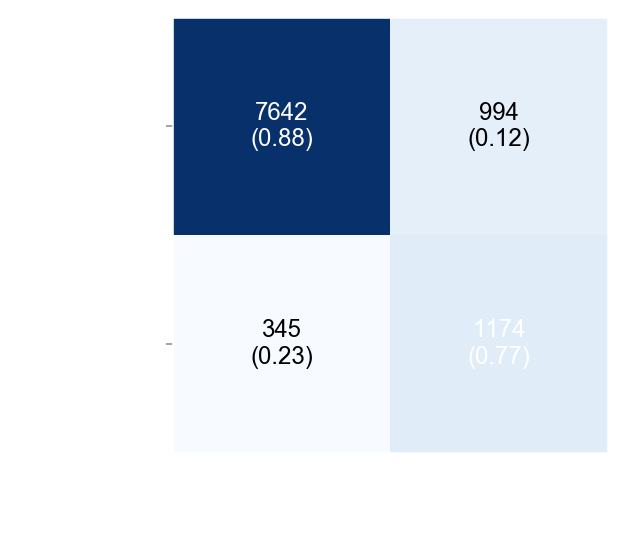

In [198]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[7642 , 994],
 [ 345 ,1174]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False, cmap='Blues')
ax = plt.xlabel('Predicted', color='white')
ax = plt.ylabel('Actual', color='white')

ax = plt.xticks(np.arange(2), ('No Default', 'Default'), color='white')
ax = plt.yticks(np.arange(2), ('No Default', 'Default'), color='white')
#ax = plt.title('Confusion Matrix Results', color='skyblue')
plt.show()

